In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import re
from typing import List
import os
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

In [3]:
def load_docs(source_dir: str) -> List[List[str]]:
    docs = []
    for doc_name in os.listdir(source_dir):
        if os.path.isdir(doc_name):
            continue
        with open(f'{source_dir}/{doc_name}') as fh:
            doc = fh.readlines()
            docs.append(doc)
    return docs

In [4]:
docs = load_docs('clean_txt')

In [5]:
docs_tokenized = [sent.split() for doc in docs for sent in doc]

In [6]:
max_len = max([len(sent) for doc in docs for sent in doc])
max_len

1136

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

def show_similarity_for_single_word(model, word):
    matrix = cosine_similarity(model.wv[word].reshape(1, -1), model.wv.vectors)
    plt.hist(matrix.squeeze(0), bins='rice', edgecolor='k')
    plt.title(f'Распределение схожести для слова {word}')

### Модель 0

In [8]:
%%time

model_w2v_0 = Word2Vec(
    vector_size=100,
    window=5, 
    min_count=2,
    sg=0,  # CBOW
    workers=1,
    seed=42
)

model_w2v_0.epochs = 10

model_w2v_0.build_vocab(docs_tokenized)

model_w2v_0.train(docs_tokenized,
                total_examples=model_w2v_0.corpus_count,
                epochs=model_w2v_0.epochs)

CPU times: user 3.53 s, sys: 12.5 ms, total: 3.54 s
Wall time: 3.51 s


(2593676, 2803990)

In [9]:
model_w2v_0.wv.most_similar('varicose')

[('dopaminergic', 0.8862311840057373),
 ('saphenous', 0.8847014904022217),
 ('vein', 0.865838885307312),
 ('phlebitis', 0.8653373718261719),
 ('urticaria', 0.8577818274497986),
 ('placement', 0.8566332459449768),
 ('tympanostomy', 0.8517608046531677),
 ('probiotic', 0.8497269749641418),
 ('remedy', 0.8480321764945984),
 ('indwelling', 0.8415325880050659)]

In [10]:
model_w2v_0.wv.most_similar('cardiology')

[('conference', 0.8615592122077942),
 ('discus', 0.8513166308403015),
 ('psychiatry', 0.8497378826141357),
 ('wisconsin', 0.8486154675483704),
 ('key', 0.8473686575889587),
 ('sport', 0.8464640974998474),
 ('academy', 0.8452419638633728),
 ('naepp', 0.8429384231567383),
 ('force', 0.8389191627502441),
 ('pulmonology', 0.8384740352630615)]

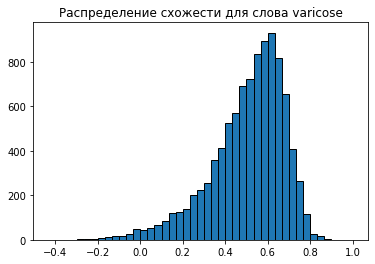

In [11]:
show_similarity_for_single_word(model_w2v_0, 'varicose')

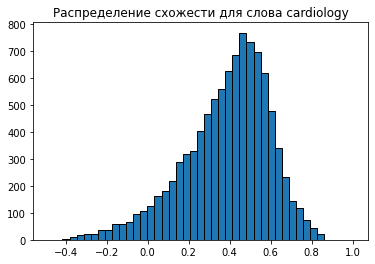

In [12]:
show_similarity_for_single_word(model_w2v_0, 'cardiology')

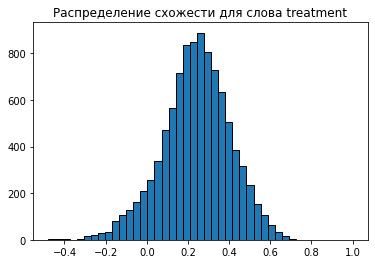

In [13]:
show_similarity_for_single_word(model_w2v_0, 'treatment')

### Модель 1

In [14]:
%%time

model_w2v_1 = Word2Vec(
    vector_size=100,
    window=5, 
    min_count=2,
    sg=1,  # SG
    workers=1,
    seed=42
)

model_w2v_1.epochs = 10

model_w2v_1.build_vocab(docs_tokenized)

model_w2v_1.train(docs_tokenized,
                total_examples=model_w2v_1.corpus_count,
                epochs=model_w2v_1.epochs)

CPU times: user 11.5 s, sys: 11.6 ms, total: 11.5 s
Wall time: 11.1 s


(2593676, 2803990)

In [15]:
model_w2v_1.wv.most_similar('varicose')

[('saphenous', 0.9160230755805969),
 ('thread', 0.9130890965461731),
 ('sclerotherapy', 0.9127246141433716),
 ('vein', 0.9099157452583313),
 ('stripping', 0.8768081665039062),
 ('saphenofemoral', 0.8541380763053894),
 ('indwelling', 0.8357131481170654),
 ('superficial', 0.829720675945282),
 ('counterbalanced', 0.825311541557312),
 ('ligated', 0.8217650651931763)]

In [16]:
model_w2v_1.wv.most_similar('cardiology')

[('council', 0.9232656955718994),
 ('consortium', 0.9196678996086121),
 ('pulmonology', 0.9191343188285828),
 ('sponsor', 0.9155759215354919),
 ('idsa', 0.9107913970947266),
 ('sponsored', 0.9069226980209351),
 ('official', 0.9057037830352783),
 ('acog', 0.9051952958106995),
 ('commissioned', 0.9003769755363464),
 ('mhra', 0.8970770239830017)]

In [17]:
model_w2v_1.wv.most_similar('treatment')

[('therapy', 0.6159456968307495),
 ('management', 0.6154820322990417),
 ('metoclopramide', 0.5908429622650146),
 ('relapsed', 0.5878416895866394),
 ('boulardii', 0.5820193886756897),
 ('nonpharmacological', 0.5817995667457581),
 ('treating', 0.5807437300682068),
 ('pimecrolimus', 0.5770063996315002),
 ('highpotency', 0.5750764012336731),
 ('welltolerated', 0.568181037902832)]

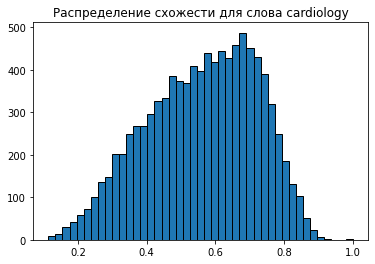

In [18]:
show_similarity_for_single_word(model_w2v_1, 'cardiology')

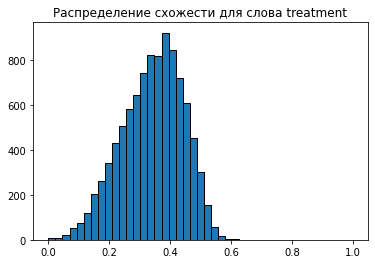

In [19]:
show_similarity_for_single_word(model_w2v_1, 'treatment')

### Модель 2

In [20]:
%%time

model_w2v_2 = Word2Vec(
    vector_size=100,
    window=10, 
    min_count=2,
    sg=1,  # SG
    workers=1,
    seed=42
)

model_w2v_2.epochs = 10

model_w2v_2.build_vocab(docs_tokenized)

model_w2v_2.train(docs_tokenized,
                total_examples=model_w2v_2.corpus_count,
                epochs=model_w2v_2.epochs)

CPU times: user 17.5 s, sys: 11 ms, total: 17.5 s
Wall time: 17.1 s


(2593244, 2803990)

In [27]:
model_w2v_2.wv.most_similar('heart')

[('congestive', 0.7816011309623718),
 ('pacemaker', 0.7327263355255127),
 ('transplant', 0.7313067317008972),
 ('iiiv', 0.7241445183753967),
 ('leftventricular', 0.7125802636146545),
 ('failure', 0.6960839033126831),
 ('chf', 0.6940628886222839),
 ('postmyocardial', 0.6901230216026306),
 ('reykjavik', 0.6886174082756042),
 ('nyha', 0.6840158700942993)]

In [21]:
model_w2v_2.wv.most_similar('treatment')

[('therapy', 0.6139280796051025),
 ('immunosuppressive', 0.601547122001648),
 ('mtx', 0.6009293794631958),
 ('relapsed', 0.5982491374015808),
 ('abbreviated', 0.5925164222717285),
 ('longerterm', 0.5914967060089111),
 ('guanfacine', 0.591187596321106),
 ('difficileassociated', 0.5911017656326294),
 ('nondirective', 0.5902730226516724),
 ('metoclopramide', 0.5860422849655151)]

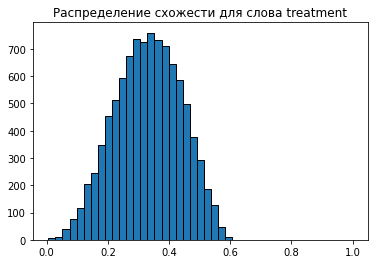

In [22]:
show_similarity_for_single_word(model_w2v_2, 'treatment')

### Модель 3

In [23]:
%%time

model_w2v_3 = Word2Vec(
    vector_size=100,
    window=25, 
    min_count=2,
    sg=0,  # SG
    workers=1,
    seed=42
)

model_w2v_3.epochs = 10

model_w2v_3.build_vocab(docs_tokenized)

model_w2v_3.train(docs_tokenized,
                total_examples=model_w2v_3.corpus_count,
                epochs=model_w2v_3.epochs)

CPU times: user 4.57 s, sys: 20.3 ms, total: 4.59 s
Wall time: 4.09 s


(2592637, 2803990)

In [26]:
model_w2v_3.wv.most_similar('cardiology')

[('familiar', 0.7186689376831055),
 ('nuclear', 0.7109702825546265),
 ('radionuclide', 0.6569560766220093),
 ('ideally', 0.6489567160606384),
 ('companion', 0.6429451107978821),
 ('wheez', 0.6363751888275146),
 ('mrfit', 0.6099407076835632),
 ('cht', 0.6061455011367798),
 ('await', 0.5900614857673645),
 ('assign', 0.584007203578949)]

In [24]:
model_w2v_3.wv.most_similar('treatment')

[('amitriptyline', 0.7586389780044556),
 ('relapse', 0.7572187185287476),
 ('biofeedback', 0.7571710348129272),
 ('welltolerated', 0.7442721128463745),
 ('corticosteroid', 0.7417144775390625),
 ('desmopressin', 0.7312538623809814),
 ('divalproex', 0.7256027460098267),
 ('pharmacotherapy', 0.7248607277870178),
 ('migraine', 0.7220543622970581),
 ('valproate', 0.7181082963943481)]

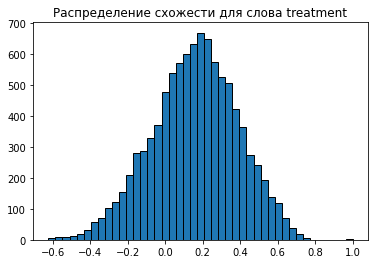

In [25]:
show_similarity_for_single_word(model_w2v_3, 'treatment')